In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
cocola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

C:\Users\sangharsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

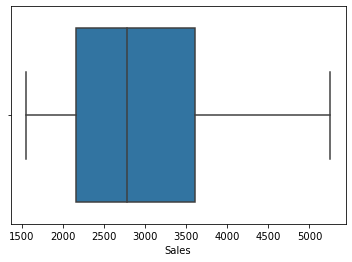

In [3]:
sns.boxplot("Sales",data=cocola)

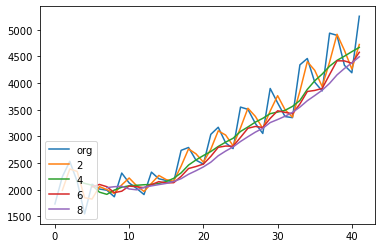

In [6]:
# moving average for the time series to understand better about the trend character in Amtrak
cocola.Sales.plot(label="org")
for i in range(2,10,2):
    cocola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
    

In [ ]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(cocola.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(cocola.Sales,model="multiplicative")
decompose_ts_mul.plot()


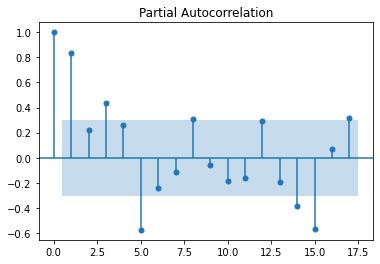

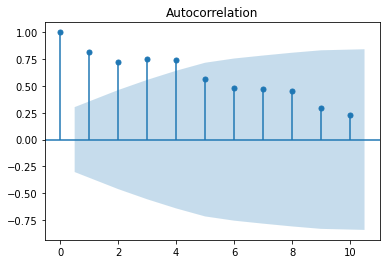

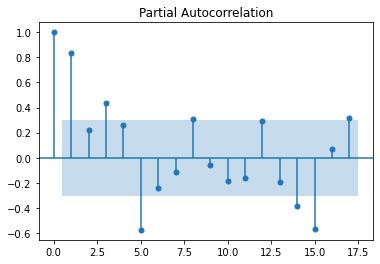

In [7]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cocola.Sales,lags=10)
tsa_plots.plot_pacf(cocola.Sales)


In [8]:
# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 

Train = cocola.head(48)
Test =cocola.tail(12)

In [9]:

# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)



In [11]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


9.681026212917576

In [12]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

11.02517475963169

In [18]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)


<ipython-input-18-0da59f3c1cca>:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.2286108955055615

In [17]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)


C:\Users\sangharsh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2.883982290080407

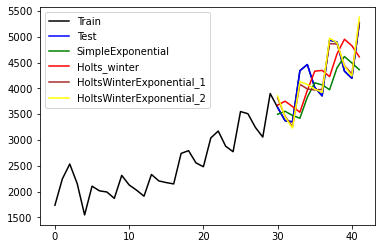

In [16]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')
